In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, utils, datasets
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 74s 0us/step 


C:\Users\DELL\anaconda3\envs\ml\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.3329 - loss: 1.8015 - val_accuracy: 0.5229 - val_loss: 1.3242
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5519 - loss: 1.2516 - val_accuracy: 0.6143 - val_loss: 1.1075
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6220 - loss: 1.0785 - val_accuracy: 0.6343 - val_loss: 1.0394
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6612 - loss: 0.9714 - val_accuracy: 0.6602 - val_loss: 0.9704
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6871 - loss: 0.8970 - val_accuracy: 0.6767 - val_loss: 0.9418
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7093 - loss: 0.8263 - val_accuracy: 0.6975 - val_loss: 0.8628
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7304 - loss: 0.7660 - val_accuracy: 0.6995 - val_loss: 0.8857
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7482 - loss: 0.7224 - val_ac

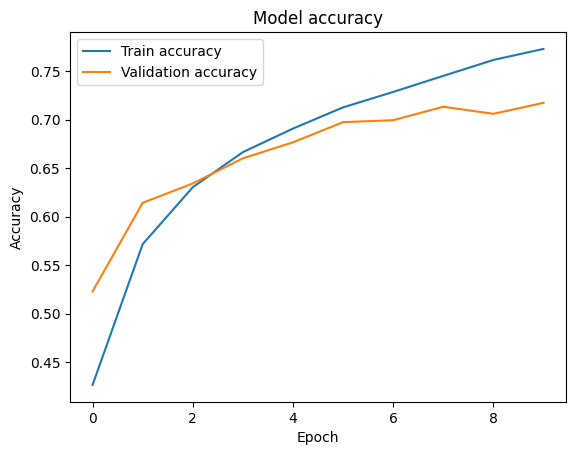

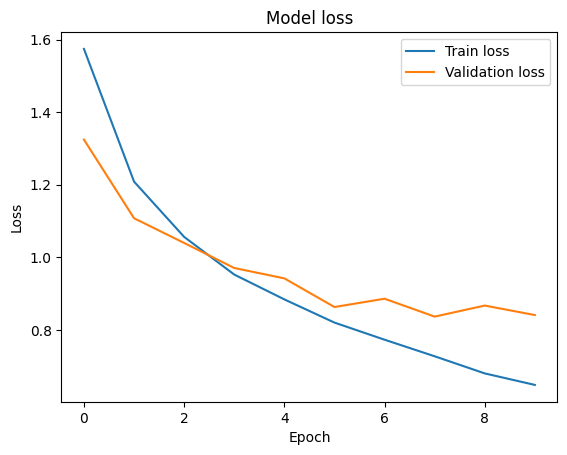

In [11]:
# Program 1: CNN on CIFAR-10 Dataset

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.2f}')

plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
# --- Program 2: NN for Iris Dataset ---
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=1)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')

Epoch 1/100


C:\Users\DELL\anaconda3\envs\ml\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4614 - loss: 1.0535   
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5872 - loss: 0.9552 
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5766 - loss: 0.9545 
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7419 - loss: 0.8597 
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7369 - loss: 0.7798 
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6998 - loss: 0.7521 
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7368 - loss: 0.6777 
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8282 - loss: 0.6658 
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7645 - loss: 0.5820 
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8072 - loss: 0.4573 
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8117 - loss: 0.5221 
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy

In [13]:
# --- Program 3: DNN on MNIST Dataset ---
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step 
Epoch 1/5


C:\Users\DELL\anaconda3\envs\ml\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8605 - loss: 0.4695
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9578 - loss: 0.1417
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9673 - loss: 0.1093
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9729 - loss: 0.0876
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9765 - loss: 0.0760
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.9744 - loss: 0.0864 


[0.07286372780799866, 0.9782999753952026]

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step 
Epoch 1/5


C:\Users\DELL\anaconda3\envs\ml\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 61ms/step - accuracy: 0.6483 - loss: 0.6039 - val_accuracy: 0.8660 - val_loss: 0.3183
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.9514 - loss: 0.1426 - val_accuracy: 0.8500 - val_loss: 0.3950
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.9960 - loss: 0.0183 - val_accuracy: 0.8644 - val_loss: 0.4412
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.9998 - loss: 0.0018 - val_accuracy: 0.8762 - val_loss: 0.4950
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 1.0000 - loss: 3.1384e-04 - val_accuracy: 0.8732 - val_loss: 0.5123
782/782 - 4s - 5ms/step - accuracy: 0.8665 - loss: 0.5325

Test accuracy: 0.87


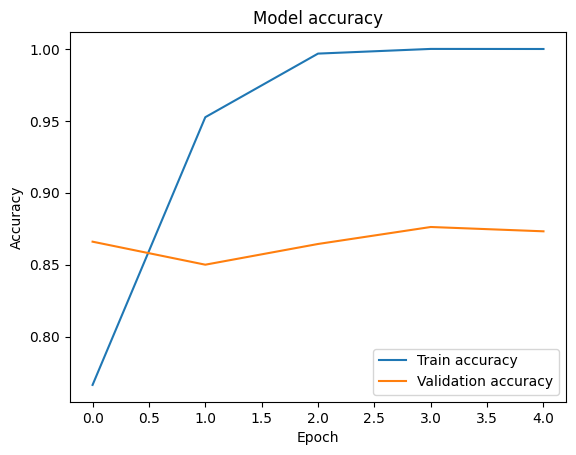

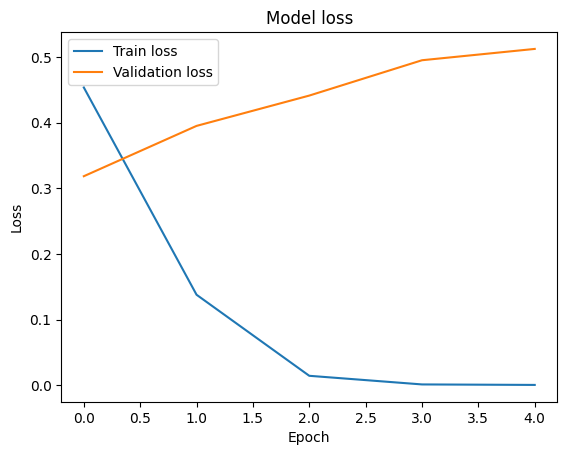

In [14]:
# --- Program 4: DNN on IMDB Text Classification ---
max_words = 10000
(x_train, y_train), (x_test, y_test) = datasets.imdb.load_data(num_words=max_words)
maxlen = 500
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

model = Sequential()
model.add(layers.Embedding(input_dim=max_words, output_dim=128, input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.2f}')

plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
#titanic 
df = pd.read_csv('Titanic-Dataset.csv')
df = df.dropna(subset=['Age', 'Fare'])


df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(layers.Dense(16, activation='relu', input_dim=X_train.shape[1]))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) 

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.2f}")

Epoch 1/50


C:\Users\DELL\anaconda3\envs\ml\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3364 - loss: 0.7565   
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.5347 - loss: 0.6993
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.7277 - loss: 0.6622
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8081 - loss: 0.5802  
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.8375 - loss: 0.4936
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.8026 - loss: 0.4649
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.8138 - loss: 0.4296
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8282 - loss: 0.3887  
Epoch 9/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.8534 - loss: 0.3815
Epoch 10/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8356 - loss: 0.3828  
Epoch 11/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8188 - loss: 0.4102  
Epoch 12/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accurac

In [20]:
#Heart 
df = pd.read_csv('Heart Prediction Quantum Dataset.csv')

X = df.iloc[:, :6]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(layers.Dense(6, activation='relu', input_dim=X_train.shape[1]))
model.add(layers.Dense(1, activation='sigmoid'))  

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=3, verbose=1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')

Epoch 1/100


C:\Users\DELL\anaconda3\envs\ml\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 867us/step - accuracy: 0.5834 - loss: 0.7218  
Epoch 2/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.6718 - loss: 0.6128
Epoch 3/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.6862 - loss: 0.5876
Epoch 4/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.7355 - loss: 0.5002
Epoch 5/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.7598 - loss: 0.4727
Epoch 6/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - accuracy: 0.7985 - loss: 0.4576
Epoch 7/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.8366 - loss: 0.4087
Epoch 8/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.8382 - loss: 0.4049
Epoch 9/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.8387 - loss: 0.3614
Epoch 10/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.8786 - loss: 0.3254
Epoch 11/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.8833 - loss: 0.2879
Epoch 12/100
134/134 ━━━━━━━━

In [23]:
#diabetes
data = pd.read_csv('diabetes.csv')
df = pd.DataFrame(data)


X = df.iloc[:, :-1]   
y = df.iloc[:, -1]    

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(layers.Dense(32, input_dim=8, activation='relu')) 
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/100


C:\Users\DELL\anaconda3\envs\ml\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5232 - loss: 0.7082   
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7031 - loss: 0.5939 
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7468 - loss: 0.5331 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7572 - loss: 0.5042 
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7385 - loss: 0.4998 
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7580 - loss: 0.4930 
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7726 - loss: 0.4714 
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7658 - loss: 0.4698 
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7686 - loss: 0.4611 
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7510 - loss: 0.4791 
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7769 - loss: 0.4416 
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy